In [ ]:
!pwd
BASE_DIR='drive/MyDrive/kaggle/'
# !cd drive/MyDrive/kaggle && unzip WeedCrop.zip
# !cd drive/MyDrive/kaggle && unzip Lincoln_beet.zip

/content


In [ ]:
import pandas as pd
import numpy as np
!pip install ultralytics
from ultralytics import YOLO
import torch

import shutil
import os
import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
source_folder = BASE_DIR+"CropWeedClassification/WeedCrop.v1i.yolov5pytorch"

In [ ]:
# Test folder
test_source_images = os.path.join(source_folder, "test/images")
test_source_labels = os.path.join(source_folder, "test/labels")

test_destination_folder = BASE_DIR+"CropWeedClassification/working/test"
# !sudo mkdir -p "CropWeedClassification/working/test"
os.makedirs(test_destination_folder, exist_ok=True)

# Moving images
shutil.copytree(test_source_images, os.path.join(test_destination_folder, "images"))

# Move labels
shutil.copytree(test_source_labels, os.path.join(test_destination_folder, "labels"))

'drive/MyDrive/kaggle/CropWeedClassification/working/test/labels'

In [ ]:
# Train folder
train_source_images = os.path.join(source_folder, "train/images")
train_source_labels = os.path.join(source_folder, "train/labels")

train_destination_folder = BASE_DIR+"CropWeedClassification/working/train"
os.makedirs(train_destination_folder, exist_ok=True)

# moving images
shutil.copytree(train_source_images, os.path.join(train_destination_folder, "images"))

# moving labels
shutil.copytree(train_source_labels, os.path.join(train_destination_folder, "labels"))


# Valid folder
valid_source_images = os.path.join(source_folder, "valid/images")
valid_source_labels = os.path.join(source_folder, "valid/labels")

valid_destination_folder = BASE_DIR+"CropWeedClassification/working/valid"
os.makedirs(valid_destination_folder, exist_ok=True)

# moving images
shutil.copytree(valid_source_images, os.path.join(valid_destination_folder, "images"))

# moving labels
shutil.copytree(valid_source_labels, os.path.join(valid_destination_folder, "labels"))

'drive/MyDrive/kaggle/CropWeedClassification/working/valid/labels'

In [ ]:
def move_files(file_path, source_folder, destination_folder):
    # Read a list of file names
    with open(file_path, "r") as file:
        file_names = [os.path.basename(line.strip()) for line in file.readlines()]

    # Folders for images and labels
    images_folder = os.path.join(destination_folder, "images")
    labels_folder = os.path.join(destination_folder, "labels")

     # Moving files
    for file_name in file_names:
        image_file = os.path.join(source_folder, file_name)
        label_file = os.path.join(source_folder, file_name.replace(".png", ".txt"))
        # print(image_file)
        # print(label_file)
        if os.path.isfile(image_file):
            shutil.copy(image_file, images_folder)
        if os.path.isfile(label_file):
            shutil.copy(label_file, labels_folder)

In [ ]:
train_file = BASE_DIR+"all_fields_lincolnbeet/all_fields_lincolnbeet_train_.txt"
valid_file = BASE_DIR+"all_fields_lincolnbeet/all_fields_lincolnbeet_val_.txt"
test_file = BASE_DIR+"all_fields_lincolnbeet/all_fields_lincolnbeet_test_.txt"

source_folder = BASE_DIR+"all_fields_lincolnbeet/all"
train_destination = BASE_DIR+"CropWeedClassification/working/train"
valid_destination = BASE_DIR+"CropWeedClassification/working/valid"
test_destination = BASE_DIR+"CropWeedClassification/working/test"

move_files(train_file, source_folder, train_destination)
move_files(valid_file, source_folder, valid_destination)
move_files(test_file, source_folder, test_destination)

In [ ]:
import  yaml

# Data structure
dataset = {
'train': 'train',
'val': 'valid',
'test': 'test',
'nc': 2,
'names': ['crop', 'weed']
}

In [ ]:
with open(BASE_DIR+'CropWeedClassification/working/dataset.yaml', 'w') as file:
    yaml.dump(dataset, file)

['near30_near30_04_06_2021_v_1_456.png', 'near30_near30_28_05_2021_v_5_64.png', 'near30_near30_01_06_2021_v_2_202.png', '32167_jpg.rf.140cc42ff44f213f438b7e88d30a202c.jpg', 'IMG_6030_JPG.rf.66006b49c00c47af99b3e0d504971f46.jpg', 'near30_near30_25_05_2021_v_1_38.png']


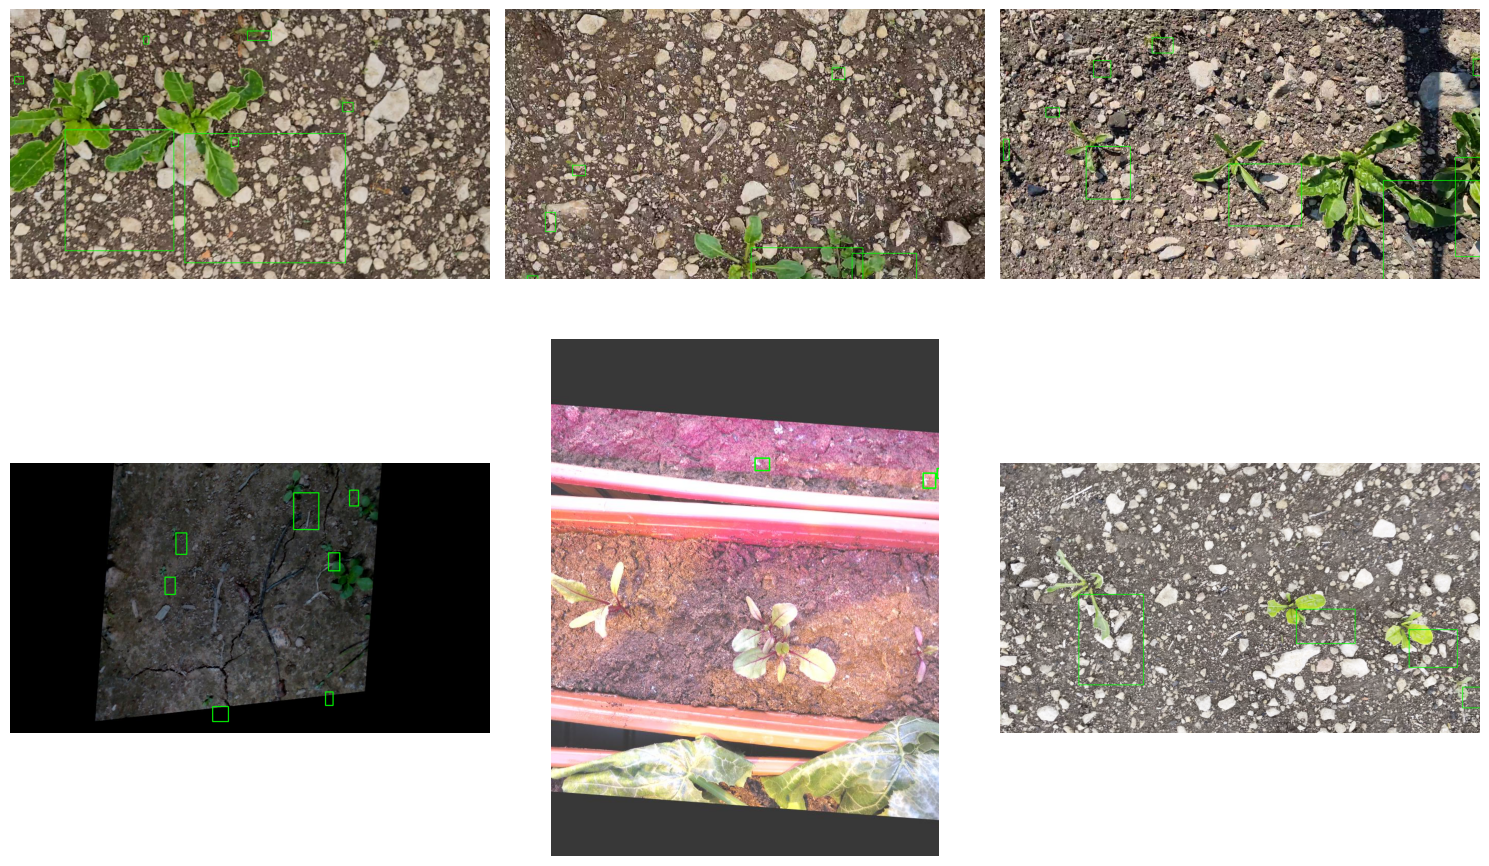

In [ ]:
# images and labels for training data
BASE_DIR='drive/MyDrive/kaggle/'
images_folder = BASE_DIR+"CropWeedClassification/working/train/images"
labels_folder = BASE_DIR+"CropWeedClassification/working/train/labels"
# loading image files names
image_files = os.listdir(images_folder)

# shuffle the images then select three images
random.shuffle(image_files)
random_image_files = image_files[:6]
print(random_image_files)
# Creating the axes to display the images
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_images):
    # loading the images and applying the preprocessing before display
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # reading text from label files
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    with open(label_file, "r") as file:
        labels = file.readlines()

    # drawing the rectangles inside the objects
    for label in labels:
        class_id, x, y, width, height = map(float, label.strip().split())
        x = int(x * image.shape[1])
        y = int(y * image.shape[0])
        width = int(width * image.shape[1])
        height = int(height * image.shape[0])
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # display the images
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model = YOLO('/content/drive/MyDrive/kaggle/TG_YOLOv8x/First_train8/weights/best.pt')

In [ ]:
model.train(data='/content/drive/MyDrive/kaggle/CropWeedClassification/working/dataset.yaml', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-5,
            project = '/content/drive/MyDrive/kaggle/TG_YOLOv8x', name='First_train',
            batch=16, device=device, seed=69)

In [ ]:
import pandas as pd
folders=['First_train','First_train2','First_train3','First_train4','First_train5',
          'First_train6','First_train7','First_train8']
dfs=[]
columns=None
for folder in folders:
  df=pd.read_csv(BASE_DIR+'TG_YOLOv8x/'+folder+'/results.csv',index_col=False)
  columns=df.columns
  dfs.extend(df.values.tolist())


In [ ]:
dfs

[[1.0,
  1.4296,
  1.2549,
  1.146,
  0.48843,
  0.63961,
  0.60021,
  0.37909,
  1.4075,
  1.3038,
  1.0804,
  0.067095,
  0.00033238,
  0.00033238],
 [2.0,
  1.4461,
  1.1525,
  1.1519,
  0.53347,
  0.67685,
  0.63874,
  0.4068,
  1.3623,
  1.1571,
  1.0593,
  0.034082,
  0.00065253,
  0.00065253],
 [3.0,
  1.4125,
  1.0946,
  1.1413,
  0.59485,
  0.70728,
  0.68593,
  0.44503,
  1.2813,
  1.0441,
  1.032,
  0.0010553,
  0.00095948,
  0.00095948],
 [4.0,
  1.3806,
  1.0633,
  1.1223,
  0.62117,
  0.69366,
  0.69178,
  0.45608,
  1.2599,
  1.0357,
  1.0267,
  0.0009406,
  0.0009406,
  0.0009406],
 [5.0,
  1.3497,
  1.0286,
  1.1107,
  0.62222,
  0.70974,
  0.70055,
  0.4633,
  1.2575,
  0.98195,
  1.0153,
  0.0009406,
  0.0009406,
  0.0009406],
 [1.0,
  1.2887,
  0.96678,
  1.0835,
  0.62954,
  0.69458,
  0.70468,
  0.4682,
  1.2629,
  1.0096,
  1.0172,
  0.067095,
  0.00033238,
  0.00033238],
 [2.0,
  1.3025,
  0.97561,
  1.0916,
  0.63809,
  0.71921,
  0.69631,
  0.45226,
  1.3032,


In [ ]:
columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
# Concatenate all dataframes in the list
final_df = pd.DataFrame(data=dfs,columns=columns)
final_df[columns[0]]=range(1,1+len(final_df))
df=final_df

### Loss

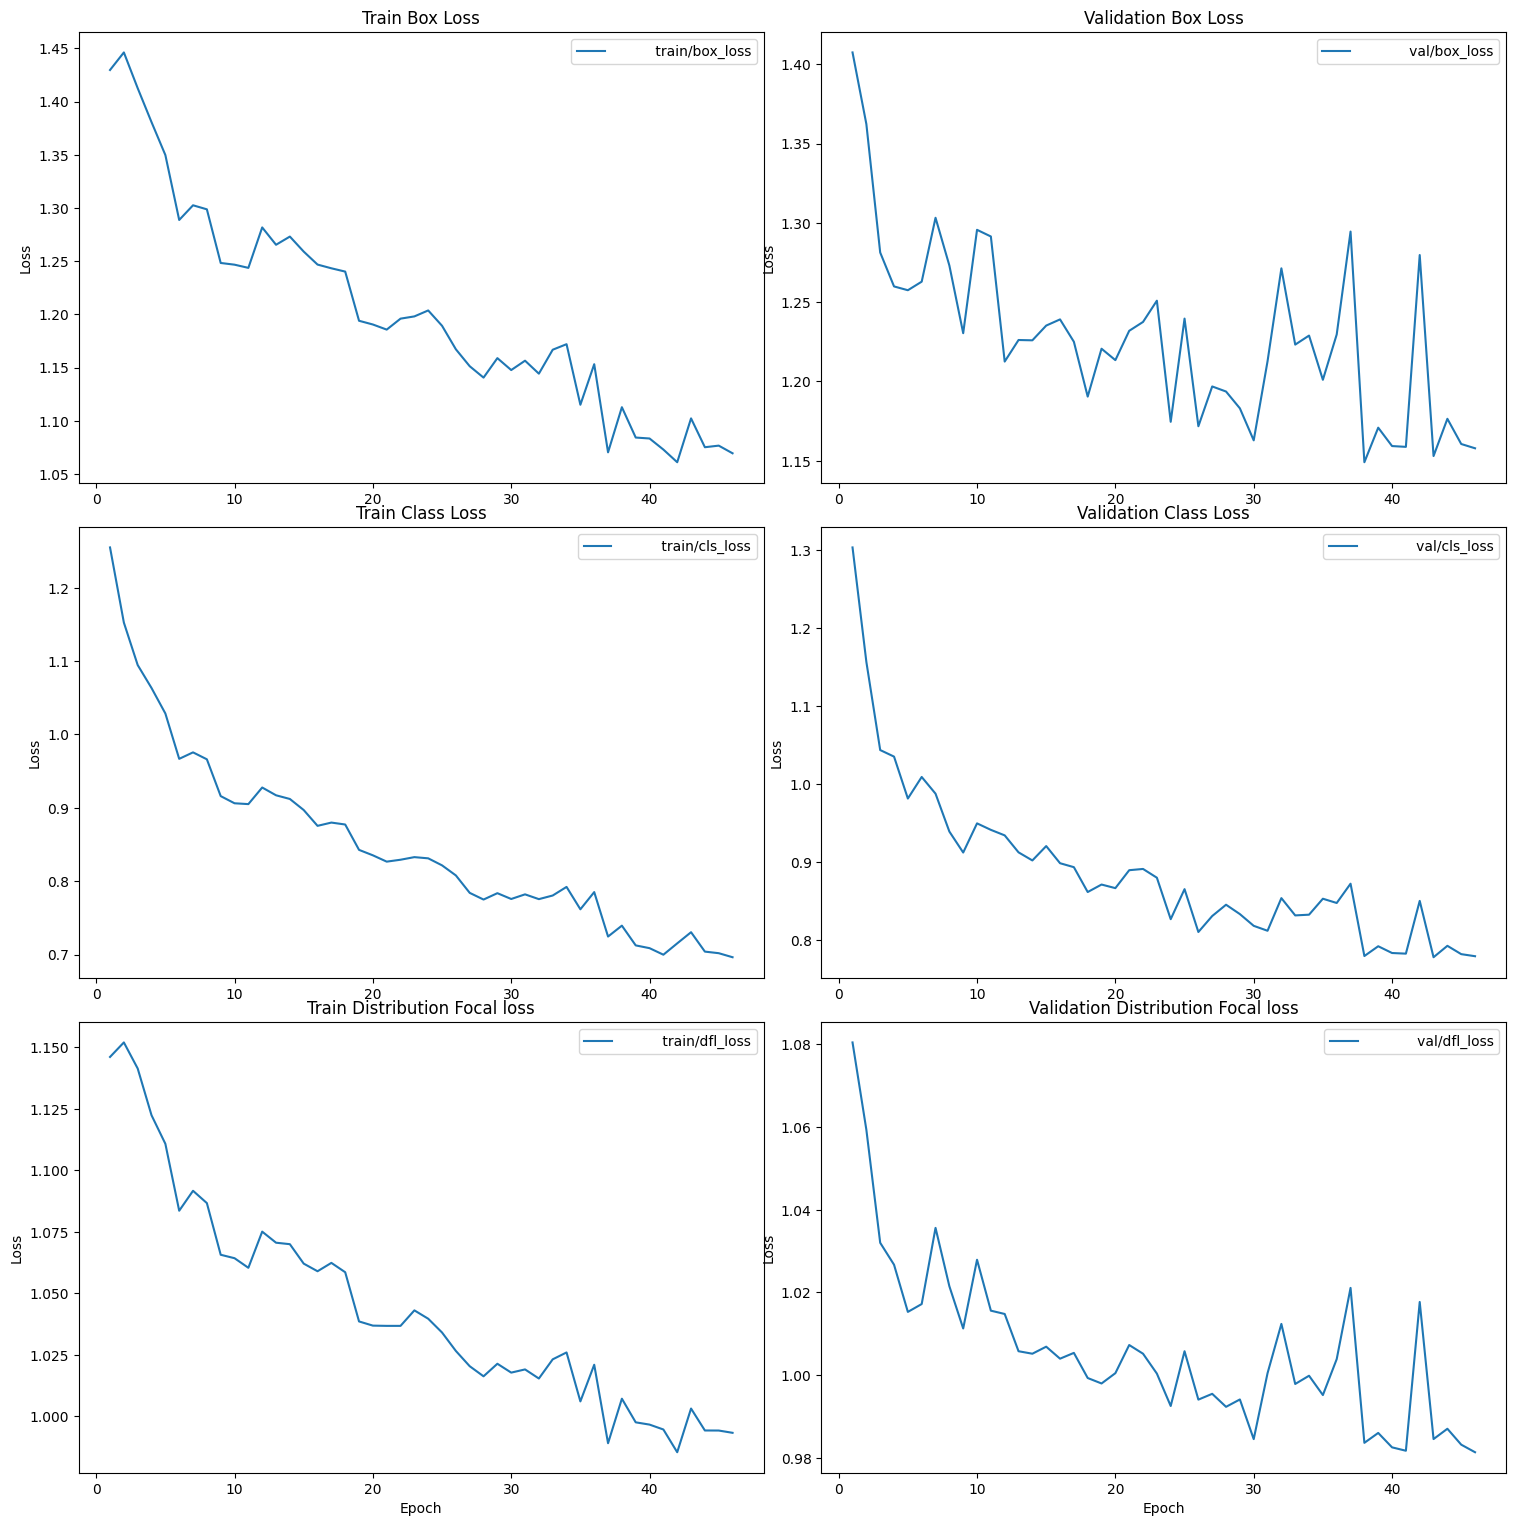

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['                  epoch'], df['         train/box_loss'], label='         train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['                  epoch'], df['           val/box_loss'], label='           val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['                  epoch'], df['         train/cls_loss'], label='         train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['                  epoch'], df['           val/cls_loss'], label='           val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['                  epoch'], df['         train/dfl_loss'], label='         train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['                  epoch'], df['           val/dfl_loss'], label='           val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

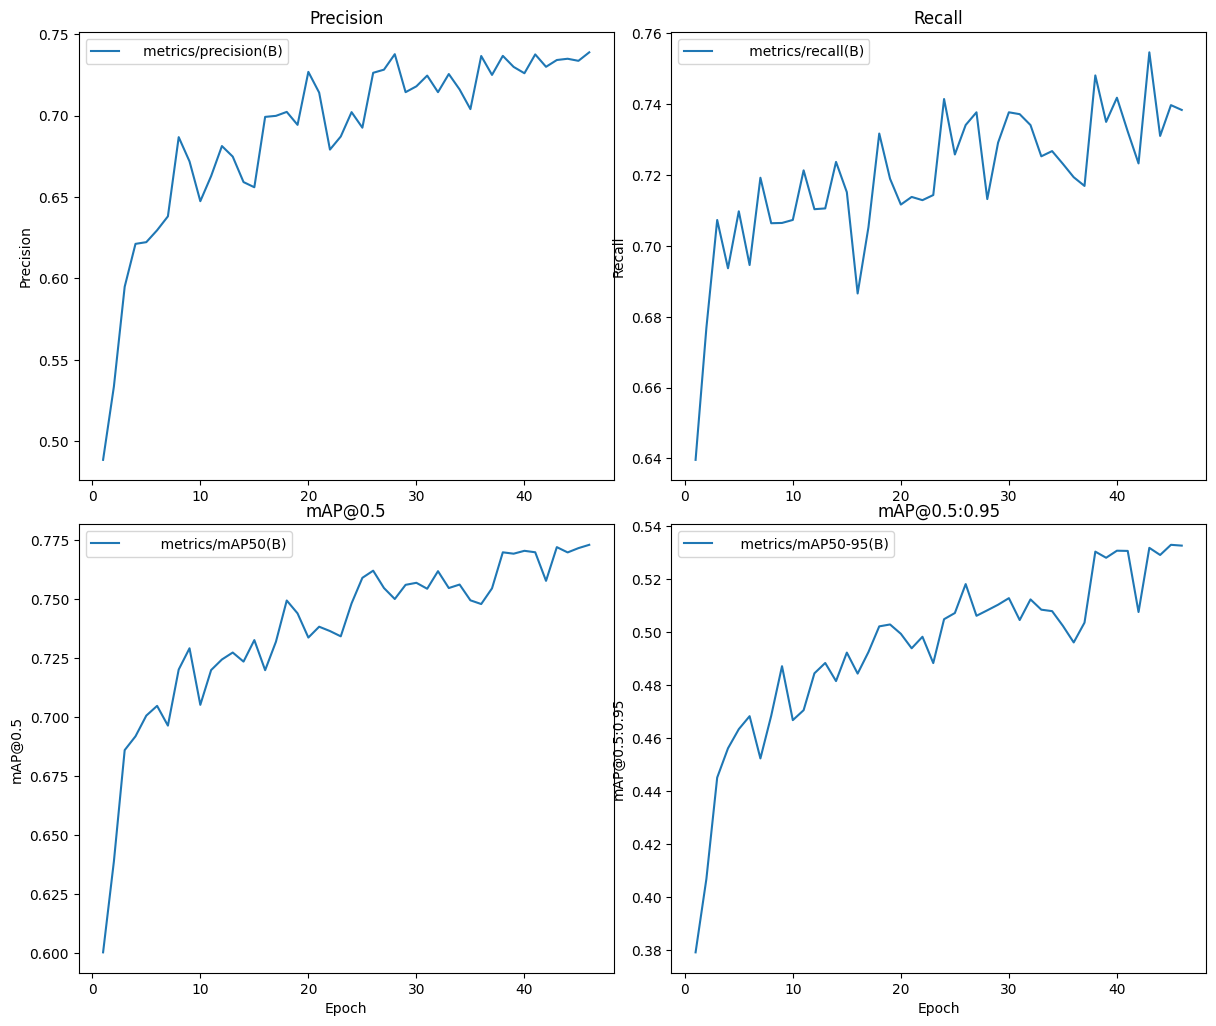

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['                  epoch'], df['   metrics/precision(B)'], label='   metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['                  epoch'], df['      metrics/recall(B)'], label='      metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# metrics/mAP50(B)
axes[1, 0].plot(df['                  epoch'], df['       metrics/mAP50(B)'], label='       metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['                  epoch'], df['    metrics/mAP50-95(B)'], label='    metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

### Evaluation


image 1/1 /content/drive/MyDrive/kaggle/CropWeedClassification/working/test/images/bbro_bbro_14_05_2021_v_0_18.png: 384x640 4 crops, 4816.3ms
Speed: 12.3ms preprocess, 4816.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


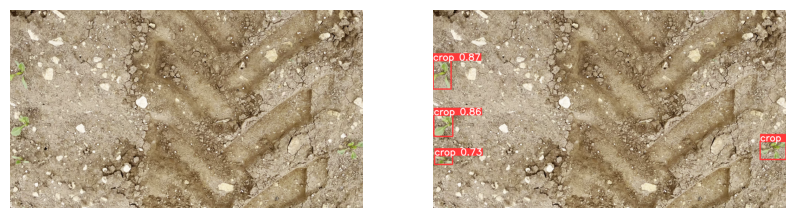

In [ ]:
res = model(BASE_DIR+'CropWeedClassification/working/test/images/bbro_bbro_14_05_2021_v_0_18.png')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
axes[0].imshow(plt.imread(BASE_DIR+'CropWeedClassification/working/test/images/bbro_bbro_14_05_2021_v_0_18.png'))
axes[0].axis('off')

# Show detected crop and weed
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();

In [ ]:
metrics = model.val(split='test', conf=0.25, device=device)

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]
val: Scanning /content/drive/MyDrive/kaggle/CropWeedClassification/working/test/labels... 999 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [08:27<00:00,  1.97it/s]


val: New cache created: /content/drive/MyDrive/kaggle/CropWeedClassification/working/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [58:09<00:00, 55.39s/it]


                   all       1001       8605      0.744      0.729      0.774       0.58
                  crop       1001       3354      0.814      0.824      0.878      0.743
                  weed       1001       5251      0.674      0.635      0.671      0.417
Speed: 4.6ms preprocess, 3367.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
metrics

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc078c47760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

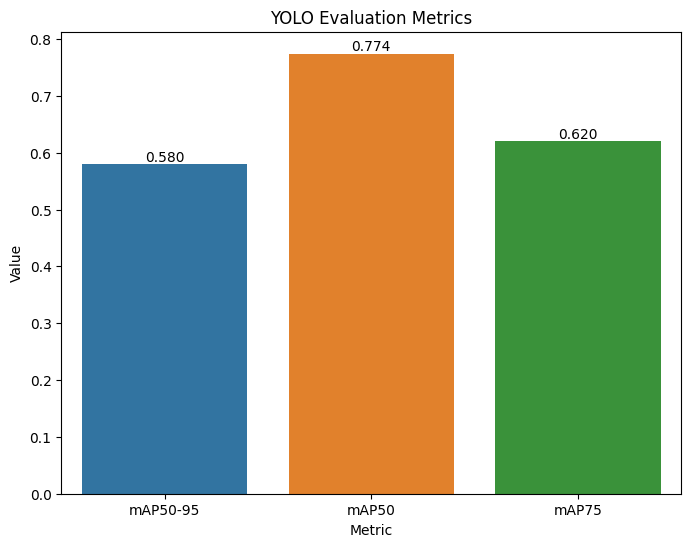

In [ ]:
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])


ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')


fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()

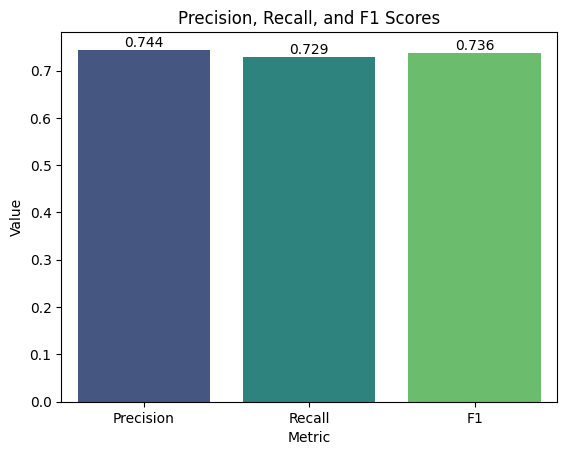

In [ ]:
# Plotting precision,recall and f1 score
precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1 = (2 * precision * recall) / (precision + recall)  # f1 score


metrics = ['Precision', 'Recall', 'F1']
values = [precision, recall, f1]

ax = sns.barplot(x=metrics, y=values, palette='viridis')

ax.set_title('Precision, Recall, and F1 Scores')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

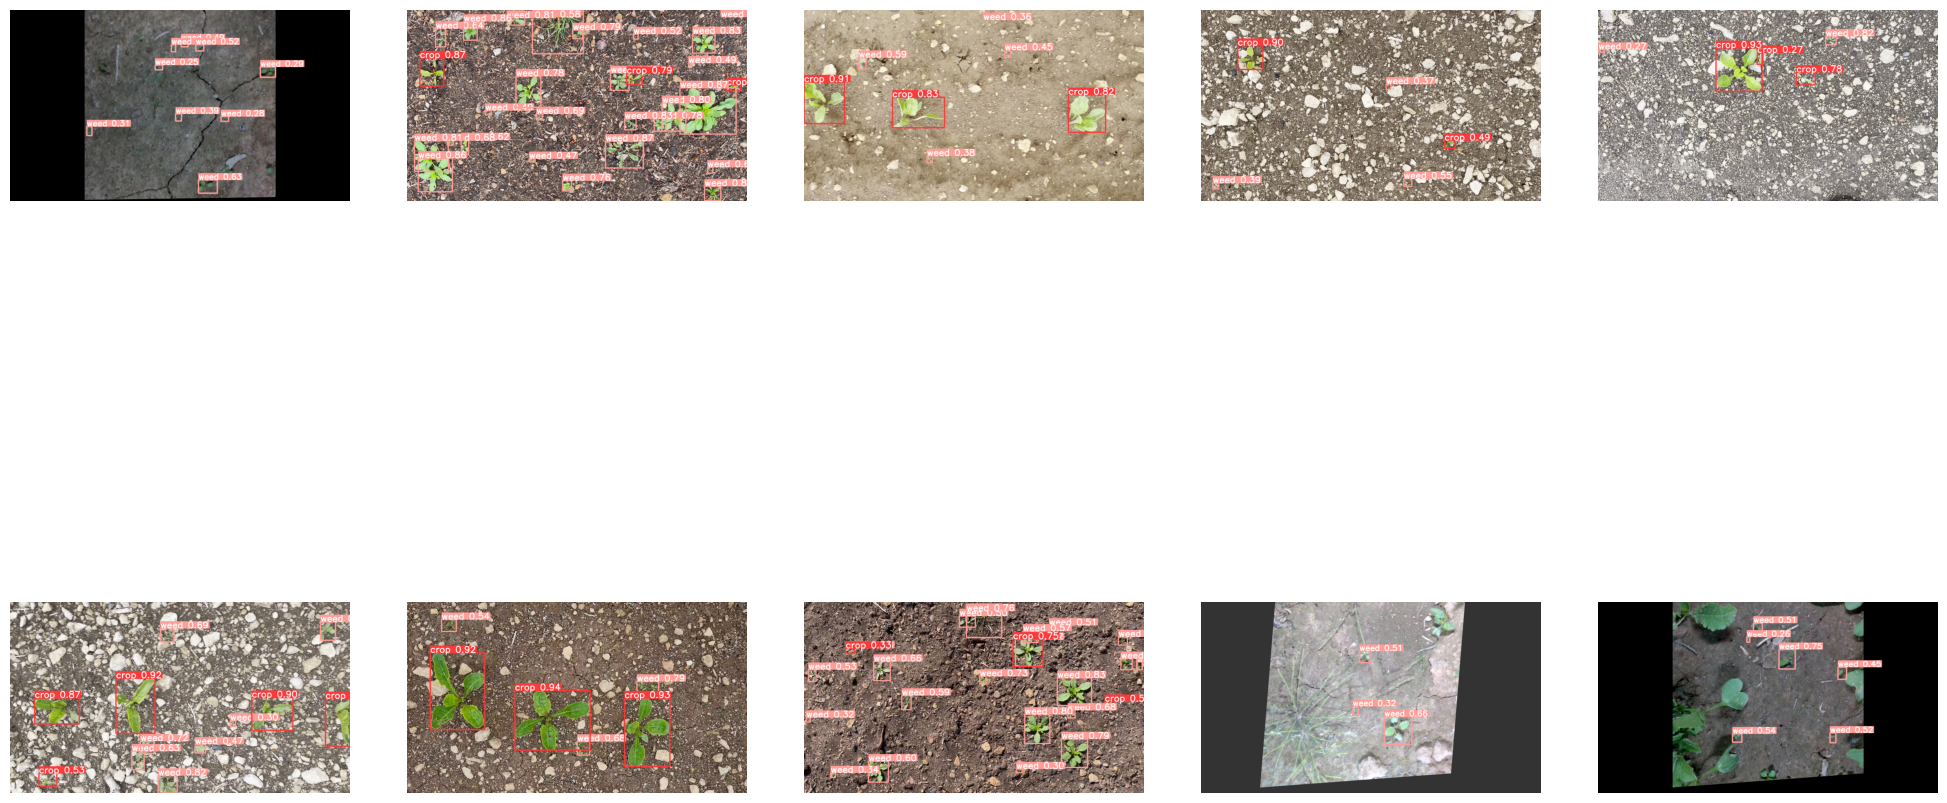

In [ ]:
# loading 10 random images from test images folder
images_folder=BASE_DIR+'CropWeedClassification/working/train/images'
random.seed(42)
image_paths = random.sample(os.listdir(images_folder), 10)

# creating subplots for the images
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
fig.tight_layout()

# plot detected crop and weeds
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(images_folder, image_paths[i])
    image = Image.open(image_path)
    res = model(image, verbose=False)
    detect_img = res[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    ax.imshow(detect_img)
    ax.axis('off')

plt.show()